In [1]:
#importing all the libraries needed for the project
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import cohen_kappa_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score as kappa
from statistics import mean 
import matplotlib.pyplot as plt
import warnings
import numpy as np # linear algebra
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
#glancing through first 50 rows of the data to check for any anomalies
df = pd.read_csv("C:/Users/rohit/OneDrive/Desktop/Subjects/Fall2020/Data mining/Project/Project_trainData.csv")
df.head(30)

,battery_power,bluetooth,clock_speed,dual_sim,front_camera_megpixels,four_g,internal_memory,mobile_depth,mobile_width,n_cores,...,pixel_height,pixel_width,ram,screen_height,screen_width,screen_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [11]:
#Looking at the column names
df.columns
#A seperate file has been attached with the metadata information

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim',
       'front_camera_megpixels', 'four_g', 'internal_memory', 'mobile_depth',
       'mobile_width', 'n_cores', 'primary_camera_megapixels', 'pixel_height',
       'pixel_width', 'ram', 'screen_height', 'screen_width', 'screen_time',
       'three_g', 'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power                2000 non-null int64
bluetooth                    2000 non-null int64
clock_speed                  2000 non-null float64
dual_sim                     2000 non-null int64
front_camera_megpixels       2000 non-null int64
four_g                       2000 non-null int64
internal_memory              2000 non-null int64
mobile_depth                 2000 non-null float64
mobile_width                 2000 non-null int64
n_cores                      2000 non-null int64
primary_camera_megapixels    2000 non-null int64
pixel_height                 2000 non-null int64
pixel_width                  2000 non-null int64
ram                          2000 non-null int64
screen_height                2000 non-null int64
screen_width                 2000 non-null int64
screen_time                  2000 non-null int64
three_g                      2000 non-null int64
touch_s

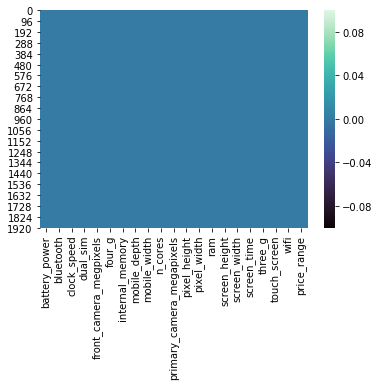

In [13]:
#to check number of nulls in the heatmap for every column
sns.heatmap(df.isnull(),cmap='mako')

In [14]:
#Trying to find corr between all the columns in our dataset
print(df.corr())

                           battery_power  bluetooth  clock_speed  dual_sim  \
battery_power                   1.000000   0.011252     0.011482 -0.041847   
bluetooth                       0.011252   1.000000     0.021419  0.035198   
clock_speed                     0.011482   0.021419     1.000000 -0.001315   
dual_sim                       -0.041847   0.035198    -0.001315  1.000000   
front_camera_megpixels          0.033334   0.003593    -0.000434 -0.029123   
four_g                          0.015665   0.013443    -0.043073  0.003187   
internal_memory                -0.004004   0.041177     0.006545 -0.015679   
mobile_depth                    0.034085   0.004049    -0.014364 -0.022142   
mobile_width                    0.001844  -0.008605     0.012350 -0.008979   
n_cores                        -0.029727   0.036161    -0.005724 -0.024658   
primary_camera_megapixels       0.031441  -0.009952    -0.005245 -0.017143   
pixel_height                    0.014901  -0.006872    -0.014523

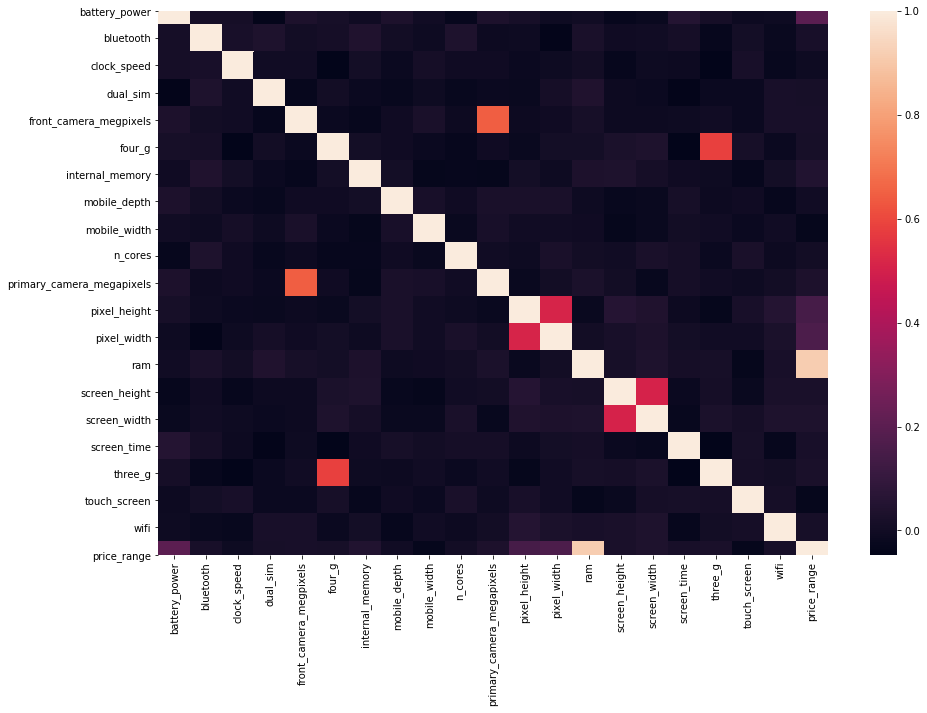

In [15]:
#Visualizaing the correlation matrix to make it easy to identify corelated columns
figure = plt.figure(figsize= (15,10))
sns.heatmap(df.corr(), cmap='rocket')
#When compared to the price range column which is our class label,
#we see high correlation with the RAM column and partial correlation battery_power, pixel_width and pixel_height column.

The correlation matrix shows that the column battery power(0.20723), pixel_height(0.148858), pixel_width(0.165818), RAM(0.917046) have strong correlation ship with the price range column

### Based on the correlation matrix Visualizing

(array([500.,   0.,   0., 500.,   0.,   0., 500.,   0.,   0., 500.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

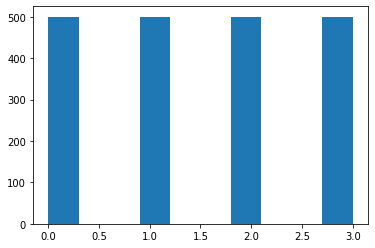

In [16]:
#Plotting the histogram to check the number of records for each price_range
plt.hist(df['price_range'])

Text(0, 0.5, 'Frequency')

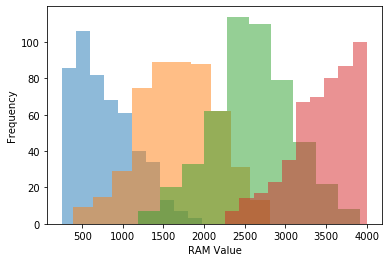

In [17]:
# Comparing RAM and price_range as they have a strong coorealation
categ_0 = df['ram'].loc[df['price_range'] == 0].to_numpy()
categ_1 = df['ram'].loc[df['price_range'] == 1].to_numpy()
categ_2 = df['ram'].loc[df['price_range'] == 2].to_numpy()
categ_3 = df['ram'].loc[df['price_range'] == 3].to_numpy()

plt.hist(categ_0, histtype='bar', alpha=0.5)
plt.hist(categ_1, histtype='bar', alpha=0.5)
plt.hist(categ_2, histtype='bar', alpha=0.5)
plt.hist(categ_3, histtype='bar', alpha=0.5)
plt.xlabel("RAM Value")
plt.ylabel("Frequency")

Some graphs from our previous visualization which further help reinstate the findings of our correlation matrix  

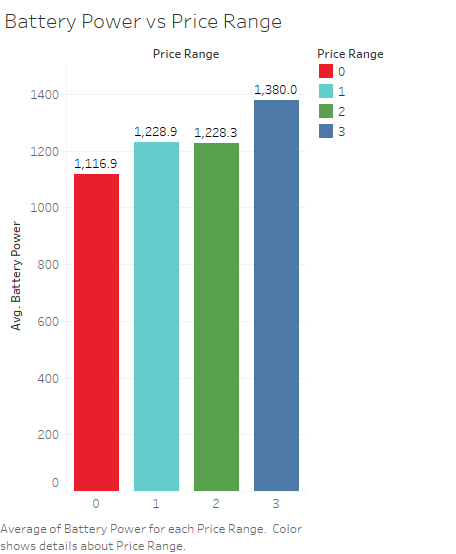


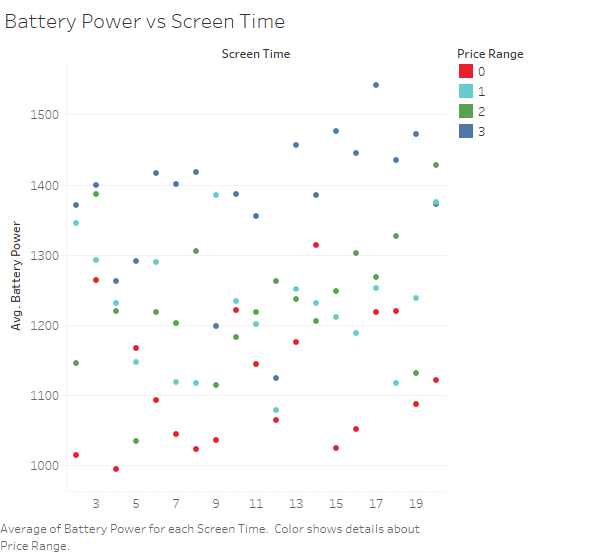

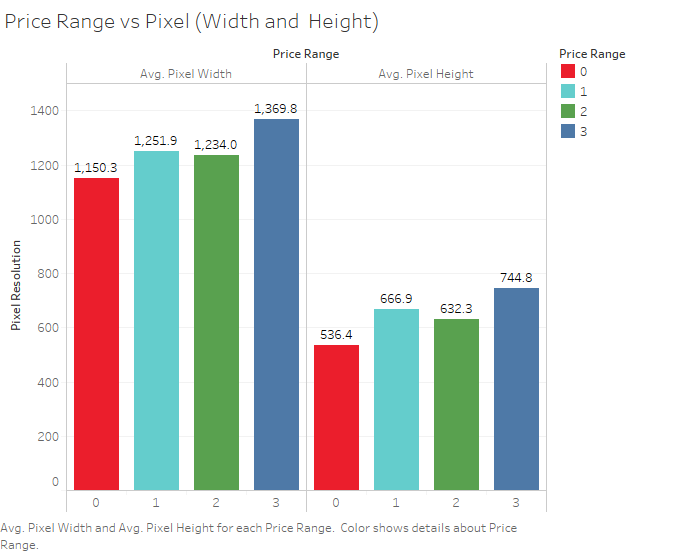

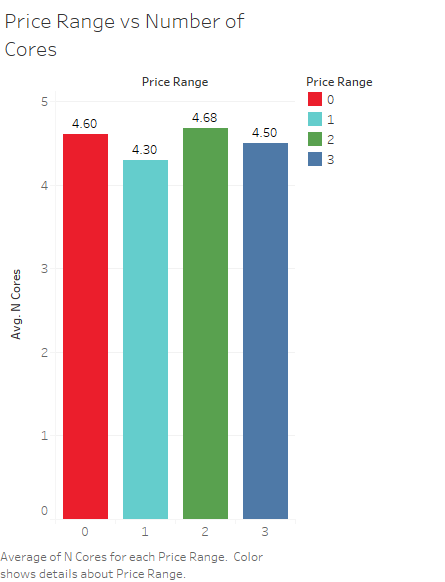

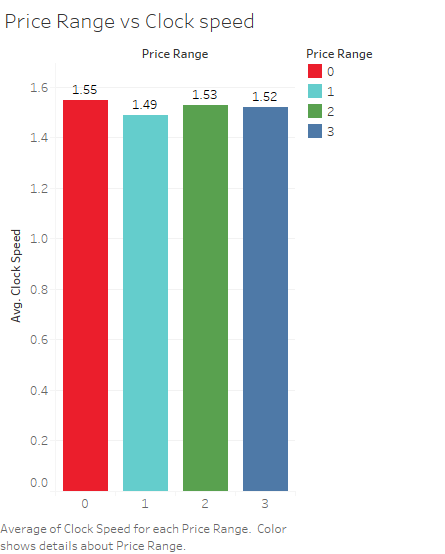

As we can see from the last 2 graphs, clock speed and number of cores have almost no correlation with our price_range column

In [18]:
#From our analysis using the correlation matrix, we will be using a train dataset with 4 columns which have some correlation with the price range column
df_train =df[['battery_power','pixel_height','pixel_width','ram', 'price_range']]

In [26]:
df_train

,battery_power,pixel_height,pixel_width,ram,price_range
0,842,20,756,2549,1
1,1021,905,1988,2631,2
2,563,1263,1716,2603,2
3,615,1216,1786,2769,2
4,1821,1208,1212,1411,1
...,...,...,...,...,...
1995,794,1222,1890,668,0
1996,1965,915,1965,2032,2
1997,1911,868,1632,3057,3
1998,1512,336,670,869,0


### Using Standard Scalar to preprocessing the data

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1 = df_train.drop('price_range', axis=1)
y = df_train['price_range']
scaler.fit(X1)
X1 = scaler.transform(X1)
X1

array([[-0.90259726, -1.40894856, -1.14678403,  0.39170341],
       [-0.49513857,  0.58577791,  1.70446468,  0.46731702],
       [-1.5376865 ,  1.39268422,  1.07496821,  0.44149774],
       ...,
       [ 1.53077336,  0.50238257,  0.88056489,  0.86013895],
       [ 0.62252745, -0.69670724, -1.34581601, -1.15745352],
       [-1.65833069, -0.3653798 , -1.15141268,  1.65500399]])

In [20]:
scaler = StandardScaler()
X = df.drop('price_range', axis=1)
# print(X)
y = df['price_range']
scaler.fit(X)
X = scaler.transform(X)


In [25]:
X4= pd.DataFrame(X1)
X4

,0,1,2,3
0,-0.902597,-1.408949,-1.146784,0.391703
1,-0.495139,0.585778,1.704465,0.467317
2,-1.537686,1.392684,1.074968,0.441498
3,-1.419319,1.286750,1.236971,0.594569
4,1.325906,1.268718,-0.091452,-0.657666
...,...,...,...,...
1995,-1.011860,1.300273,1.477661,-1.342799
1996,1.653694,0.608317,1.651235,-0.085031
1997,1.530773,0.502383,0.880565,0.860139
1998,0.622527,-0.696707,-1.345816,-1.157454


# Function for the Classification result

In [59]:
#We have created a function called classfication to get input from the user and implement any of the 4 models we have selected
#For our model evalaution we will be using accuracy, kappa and precision score
# We first start eith a simple decision tree for our classification 
#and then  apply random forest since it is use specific features and builds multiple trees and then averages the result of the trees 
#We also wanted to look at logisitic regression to check if the price range can be made as a binary classifier which we olan to analyze going ahead
#SVR gives us the flexibility to define how much error is acceptable in our model and will find an appropriate line to fit the data.
#SVR is a powerful algorithm that allows us to choose how tolerant we are of errors, 
#both through an acceptable error margin and through tuning our tolerance of falling outside that acceptable error rate
def classification(ksplit, pre, classifier):
    kf = KFold(n_splits=ksplit)
    Accuracy = []
    Precision =[]
    Kappa=[]
    y8_train=[]
    X8_train=[]
    y8_test=[]
    X8_test=[]
    
    if classifier == 'Decision Tree':
        model = DecisionTreeClassifier()
    elif classifier == 'Random Forest':
        model = RandomForestClassifier()
    elif classifier == 'Logistic Regression':   
        model = LogisticRegression()
    elif classifier == 'SVM':  
        model= svm.SVC()
    else:
        print("Please select classifier as Decision Tree, Random Forest, Logistic Regression or SVM")
        
    
    for train_index, test_index in kf.split(pre):
        X8_train, X8_test = pre[train_index], pre[test_index]
        y8_train, y8_test = y[train_index], y[test_index]
        model.fit(X8_train, y8_train)
        predict8 = model.predict(X8_test)
        accuracy = accuracy_score(y8_test, predict8)
        precision = precision_score(y8_test, predict8, average='weighted')
        kappa = cohen_kappa_score(y8_test, predict8)

        Accuracy.append(accuracy)
        Precision.append(precision)
        Kappa.append(kappa)

    #     print("Accuracy: {}".format(accuracy))
    #     print("Precision: {}".format(precision))
    #     print("Kappa: {}".format(kappa))

    
            
    print("Mean Accuracy= {};\nMean Precision= {};\nMean Kappa = {}".format(mean(Accuracy),mean(Precision), mean(Precision)))
    return mean(Accuracy),mean(Precision), mean(Precision)


In [38]:
classification(4,X1, "SVM") # For 4 selected columns
print("***********************")
classification(4,X, "SVM")# For ALL columns
#As we can see from the output, the 4 column dataset gives a better result on all 3 of our evaluation metrics

Mean Accuracy= 0.9410000000000001;
Mean Precision= 0.9418287002868433;
Mean Kappa = 0.9418287002868433
***********************
Mean Accuracy= 0.863;
Mean Precision= 0.8650474856513509;
Mean Kappa = 0.8650474856513509


(0.863, 0.8650474856513509, 0.8650474856513509)

In [39]:
classification(4,X1, "Logistic Regression")# For 4 selected columns
print("***********************")
classification(4,X, "Logistic Regression")# For ALL columns
#As we can see from the output, the all columns dataset gives a better result on all 3 of our evaluation metrics but 
#difference in result is not too significant

Mean Accuracy= 0.958;
Mean Precision= 0.9583911953810313;
Mean Kappa = 0.9583911953810313
***********************
Mean Accuracy= 0.966;
Mean Precision= 0.9662516581219265;
Mean Kappa = 0.9662516581219265


(0.966, 0.9662516581219265, 0.9662516581219265)

In [40]:
classification(4,X1, "Random Forest")# For 4 selected columns
print("***********************")
classification(4,X, "Random Forest")# For ALL columns
#For random forest, our accuracy is clearly much better for 4 selected columns

Mean Accuracy= 0.917;
Mean Precision= 0.9182190259717735;
Mean Kappa = 0.9182190259717735
***********************
Mean Accuracy= 0.873;
Mean Precision= 0.8731267319426751;
Mean Kappa = 0.8731267319426751


(0.873, 0.8731267319426751, 0.8731267319426751)

In [41]:
classification(4,X1, "Decision Tree") #For 4 columns
print("***********************")
classification(4,X, "Decision Tree")# For ALL columns
#As we can see from the output, the 4 column dataset gives a better result on all 3 of our evaluation metrics
#Hence, on 3 out of our 4 models, 4 column dataset works better 

Mean Accuracy= 0.8665;
Mean Precision= 0.8668720938386445;
Mean Kappa = 0.8668720938386445
***********************
Mean Accuracy= 0.83;
Mean Precision= 0.8298697152787006;
Mean Kappa = 0.8298697152787006


(0.83, 0.8298697152787006, 0.8298697152787006)

# Plotting Fuction: plots the accuracy vs number of folds in CV

In [42]:
def accuracyNFold_plot(n, classifier, pre):
    a=[]
    for i in list(range(2,n)):
        A, P, K = classification(i,pre, classifier)
        a.append(A)
    plt.plot(list(range(2,n)), a )
    plt.xlabel("number of folds in CV")
    plt.ylabel("Accuracy")

Mean Accuracy= 0.9485;
Mean Precision= 0.9499466391368445;
Mean Kappa = 0.9499466391368445
Mean Accuracy= 0.9554944749847298;
Mean Precision= 0.9563236363769293;
Mean Kappa = 0.9563236363769293
Mean Accuracy= 0.958;
Mean Precision= 0.9583911953810313;
Mean Kappa = 0.9583911953810313
Mean Accuracy= 0.956;
Mean Precision= 0.956961383227589;
Mean Kappa = 0.956961383227589
Mean Accuracy= 0.9544859230487973;
Mean Precision= 0.9554307610412638;
Mean Kappa = 0.9554307610412638
Mean Accuracy= 0.9564821143768513;
Mean Precision= 0.9574314731771747;
Mean Kappa = 0.9574314731771747
Mean Accuracy= 0.955;
Mean Precision= 0.9561555494918144;
Mean Kappa = 0.9561555494918144
Mean Accuracy= 0.9549863765110402;
Mean Precision= 0.9560623247952866;
Mean Kappa = 0.9560623247952866


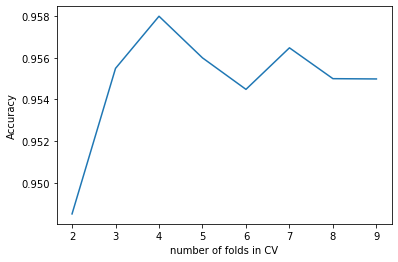

In [46]:
#Using 10 cross validation to find out the highest accuracy when n=4
accuracyNFold_plot(10, "Logistic Regression", X1)